# Linear Search vs Grover's Search Algorithm

## Installations

In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
pip install qiskit[visualization]==0.46 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00


In [3]:
pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 57.7 MB/s eta 0:00:00


In [4]:
pip install qiskit --quiet

In [5]:
pip install qiskit-ibm-provider --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 10.0 MB/s eta 0:00:00


In [6]:
pip install pandas matplotlib seaborn


## Linear Search

In [8]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [9]:
def create_set(number):
  '''
  A function to return a list of 0s and 1s of whatever length the user inputs
  '''
  emptyList = []
  for i in range(0,number):
      emptyList.append(random.randint(0,1))

  return emptyList

In [10]:
def linear(dataset):
  """
  A function that will search through each element in the list and if it is a 1
 (the marked item), its index will be added to the list called indices and that list
 will be returned
  """
  indices = []
  for i in range(0, len(dataset)):
    if dataset[i] == 1:
      indices.append(i)
  return indices


In [11]:
# creates an empty list to store the different execution times
times = []

for i in range(0,100): # algorithm is repeated 100 times with different datasets
  dataset = create_set(100000)
  start_time = time.perf_counter() # stores current time of program
  result = linear(dataset) # performs linear search
  #print(result)
  end_time = time.perf_counter() # stores current time of program
  difference = end_time-start_time # finds the difference between two times to calculate the duration of the linear search
  times.append(difference) # adds the execution time to the times list

# calculates the total time taken to run algorithm 100 times
total_time = sum(times)

# calculates the average time to run the algorithm once
average_time = total_time/100

# outputs the average time rounded to 5 decimal places
print(round(average_time,5))


0.0114


## Plotting Data for Linear Search

In [25]:
# creates a pandas dataframe
# creates a dictionary to store the time taken for algorithm to run with different dataset sizes
data = pd.DataFrame({
    'String Length': [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000],
    'Linear Time': [0.01219*100, 0.02166*100, 0.03213*100, 0.04215*100, 0.05446*100, 0.06584*100, 0.07596*100, 0.08598*100, 0.09485*100, 0.1055*100], # values multiplied by 100 so they're >1
    'Grover Time': [math.sqrt(0.01219*100), math.sqrt(0.02166*100), math.sqrt(0.03213*100), math.sqrt(0.04215*100), math.sqrt(0.05446*100), math.sqrt(0.06584*100), math.sqrt(0.07596*100), math.sqrt(0.08598*100), math.sqrt(0.09485*100), math.sqrt(0.1055*100)]
    # Grover has a time complexity of O(√n) so by rooting the values of time, we can estimate the time that Grover would take
})

# outputs the dataframe
print(data)

   String Length  Linear Time  Grover Time
0         100000        1.219     1.104083
1         200000        2.166     1.471734
2         300000        3.213     1.792484
3         400000        4.215     2.053047
4         500000        5.446     2.333667
5         600000        6.584     2.565931
6         700000        7.596     2.756084
7         800000        8.598     2.932235
8         900000        9.485     3.079773
9        1000000       10.550     3.248076


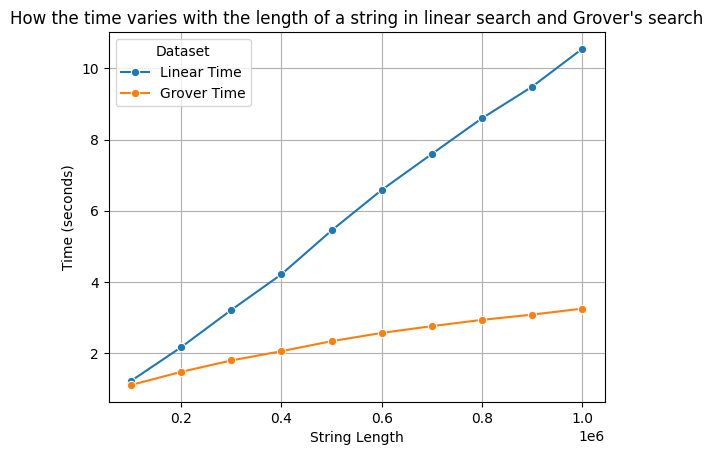

In [24]:
# the melt function is used to transform the DataFrame from wide format to long format, making it suitable for Seaborn's lineplot function
data_melted = data.melt(id_vars='String Length', var_name='Dataset', value_name='Time')

# plots graph and values with labelled axis
sns.lineplot(x='String Length', y='Time', data=data_melted, hue='Dataset', marker='o')
plt.title("How the time varies with the length of a string in linear search and Grover's search")
plt.xlabel('String Length')
plt.ylabel('Time (seconds)')
plt.grid(True)

# displays the graph
plt.show()

## Grover's Search Algorithm

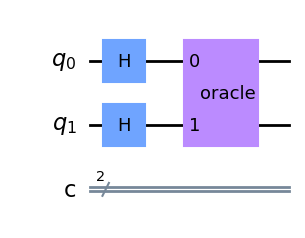

In [62]:
from qiskit import *

# define the oracle circuit with 2 qubits
oracle = QuantumCircuit(2, name='oracle')

# flip the phase of both qubits
oracle.cz(0,1)

# turn the oracle circuit into its own gate
oracle.to_gate()

# call the statevector simulator
backend = Aer.get_backend('statevector_simulator')

# define the grover circuit with 2 qubits and 2 registers
grover_circ = QuantumCircuit(2,2)

# apply H gate to both qubits to create superposition
grover_circ.h([0,1])

# add the oracle to query each state simultaneously
grover_circ.append(oracle,[0,1])

grover_circ.draw('mpl')



In [63]:
# execute the job on the simulator
job = execute(grover_circ, backend)

# retrieve results
result = job.result()

# retrieve the statevector
sv = result.get_statevector()

# round the values
np.around(sv,2)

<ipython-input-63-f73b1b1e6664>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(grover_circ, backend)


array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [46]:
# create reflection circuit with 2 qubits
#
reflection = QuantumCircuit(2, name='reflection')

#
# apply H gate to all qubits
reflection.h([0,1])

# apply a Z gate to all qubits
reflection.z([0,1])

# apply a controlled-Z gate to all qubits
reflection.cz(0,1)

# the previous three steps ensure that a negative phase is only applied to the |00> state

# transform the state back to the original state by applying an H gate
reflection.h([0,1])

# turn the reflection circuit into its own gate
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

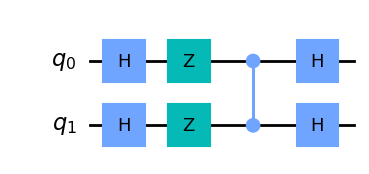

In [57]:
reflection.draw('mpl')

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


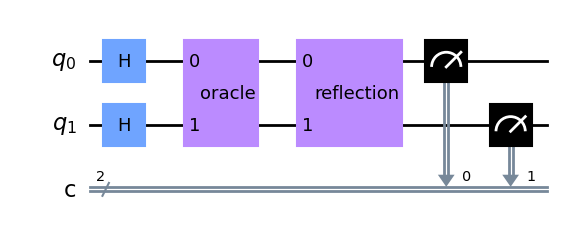

In [59]:
# call the qasm simulator
backend =  Aer.get_backend('qasm_simulator')

# create circuit with 2 qubits and 2 registers
grover_circ = QuantumCircuit(2,2)

# appy H gate to both qubits to create superposition
grover_circ.h([0,1])

# add oracle gate to both qubits
grover_circ.append(oracle,[0,1])

# add reflection operator to both qubits
grover_circ.append(reflection,[0,1])

# measure the qubits
grover_circ.measure([0,1],[0,1])

# output drawing of the circuit
grover_circ.draw('mpl')

In [60]:
# execute the job
job = execute(grover_circ, backend, shots=1000)

# get results
result = job.result()

# get counts
result.get_counts()

<ipython-input-60-d4c1968bc912>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(grover_circ, backend, shots=1000)


{'11': 1000}